Astropy: Main Package
===================

Constants, units and quantities<br>
http://docs.astropy.org/en/stable/constants/index.html

In [1]:
import astropy.constants as const

c = const.c
print(c)

  Name   = Speed of light in vacuum
  Value  = 299792458.0
  Uncertainty  = 0.0
  Unit  = m / s
  Reference = CODATA 2014


In [2]:
Msun = const.M_sun
Msun

<<class 'astropy.constants.iau2015.IAU2015'> name='Solar mass' value=1.9884754153381438e+30 uncertainty=9.236140093538353e+25 unit='kg' reference='IAU 2015 Resolution B 3 + CODATA 2014'>

In [3]:
from astropy import units as u

Msun.to(u.g)

<Quantity 1.98847542e+33 g>

In [4]:
Msun.cgs

<Quantity 1.98847542e+33 g>

In [5]:
M_1 = 6.3 * 1e33 * u.g
M_2 = 1.2 * Msun
M = M_2 + M_1
M

<Quantity 8.6861705e+30 kg>

In [6]:
c.to(u.km / u.s).value

299792.458

In [7]:
M.unit

Unit("kg")

In [8]:
wavelength = 5500 * u.AA
wavelength

<Quantity 5500. Angstrom>

In [9]:
freq = wavelength.to(u.Hz, equivalencies=u.spectral())
freq

<Quantity 5.45077196e+14 Hz>

In [10]:
energy = wavelength.to(u.eV, equivalencies=u.spectral())
energy


<Quantity 2.25425813 eV>

In [11]:
flux = 1.6 * u.Jy
flux.to(u.erg / u.s / u.cm**2, equivalencies=u.spectral_density(250 * u.nm))

<Quantity 1.91867173e-08 erg / (cm2 s)>

You can define units for numpy arrays

In [12]:
import numpy as np

n = 100000
fluxes_nounit = np.logspace(-11, -15, num=n)

In [13]:
%timeit fluxes = fluxes_nounit * u.erg / u.s / u.cm**2

4.58 ms ± 638 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [14]:
%timeit fluxes = fluxes_nounit * (u.erg / u.s / u.cm**2)

1.83 ms ± 260 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [15]:
%timeit fluxes = fluxes_nounit << u.erg / u.s / u.cm**2

122 µs ± 9.13 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [16]:
UNIT_ERGSCM2 = u.erg / u.s / u.cm**2

In [17]:
%timeit fluxes = fluxes_nounit << UNIT_ERGSCM2

22 µs ± 320 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Loading and saving data: table and fits module
------------------------------------

Tables<br>
http://docs.astropy.org/en/stable/table/index.html

In [18]:
from astropy.table import Table

filters = ['u', 'g', 'r', 'i', 'z']
fields = ['objid', 'ra', 'dec', 'mjd', 'clean'] + filters
coord_str = '0h8m05.63s +14d50m23.3s'

try:
    data = Table.read('data_sdss.fits', format='fits')
    
except FileNotFoundError:
    from astroquery.sdss import SDSS

    data = SDSS.query_region(coord_str, radius='5arcmin', photoobj_fields=fields)        
    data.write('data_sdss.fits', format='fits', overwrite=True)

In [19]:
data.show_in_notebook()

idx,objid,ra,dec,mjd,clean,u,g,r,i,z
0,1237649816422187056,2.01219902915227,14.7894897997361,51459,0,24.07576,24.00265,24.83054,22.1512,22.66878
1,1237649816422187203,1.95299341121944,14.8256122172716,51459,0,20.22866,19.00247,18.17836,17.75298,17.45335
2,1237649816422187204,1.95463127970794,14.8339586786598,51459,0,20.94712,19.8516,19.2459,18.86975,18.8138
3,1237649816422187211,2.01205735481028,14.8167239255447,51459,0,21.66072,26.35051,25.45716,23.73399,23.95504
4,1237649816422187267,1.95287107651234,14.8804076222436,51459,0,21.94335,20.84156,19.71852,19.22021,18.70168
5,1237649816422187268,1.95287107601496,14.8804076219384,51459,0,21.95738,20.85151,19.72927,19.23112,18.71271
6,1237649816422187270,1.95458131330338,14.8812058944449,51459,0,23.13733,22.46075,21.64569,21.65356,21.20413
7,1237649816422187505,2.01281446996018,14.8318121443411,51459,0,22.93904,22.79411,22.25059,21.77493,21.23205
8,1237649816422187507,2.01189264407492,14.8203059185145,51459,0,22.99942,22.40951,21.49374,21.16504,20.02995
9,1237649816422187578,1.95312481368433,14.7983856344074,51459,0,26.10128,25.08222,23.10412,21.18821,20.6646


In [20]:
data['ra']


2.01219902915227
1.95299341121944
1.95463127970794
2.01205735481028
1.95287107651234
1.95287107601496
1.95458131330338
2.01281446996018
2.01189264407492
1.95312481368433
1.95443935083853


In [21]:
data[filters]

u,g,r,i,z
float64,float64,float64,float64,float64
24.07576,24.00265,24.83054,22.1512,22.66878
20.22866,19.00247,18.17836,17.75298,17.45335
20.94712,19.8516,19.2459,18.86975,18.8138
21.66072,26.35051,25.45716,23.73399,23.95504
21.94335,20.84156,19.71852,19.22021,18.70168
21.95738,20.85151,19.72927,19.23112,18.71271
23.13733,22.46075,21.64569,21.65356,21.20413
22.93904,22.79411,22.25059,21.77493,21.23205
22.99942,22.40951,21.49374,21.16504,20.02995


In [22]:
data[-100:]

objid,ra,dec,mjd,clean,u,g,r,i,z
int64,float64,float64,int64,int64,float64,float64,float64,float64,float64
1237656495114551605,2.04074128715467,14.7715305612539,52170,0,22.64025,22.18612,20.95231,20.60263,20.21746
1237656495114551668,2.08085454394705,14.7650706027706,52170,0,24.48436,22.28477,22.33722,22.78782,22.50419
1237649816422187558,2.08199696108716,14.8268124471883,51459,0,23.6335,22.46927,20.99681,20.43393,20.38173
1237649816422187628,2.08210717871708,14.7684588562611,51459,0,26.00777,24.44548,24.18967,21.17307,23.24103
1237649816422252735,2.08178515742043,14.9159473304566,51459,0,21.87767,21.62367,20.79891,20.67485,20.28275
1237649816422252997,2.08182136785547,14.7854848607213,51459,0,23.96862,23.37568,21.66344,20.51598,19.76499
1237649816422252998,2.08202347950879,14.8268184328466,51459,0,23.63421,22.50813,20.9846,20.43194,20.30729
1237649953859240317,2.08210381283425,14.8267839585231,51465,0,22.67962,22.41091,21.35288,20.82618,20.30267
1237652943176205048,2.08208920008093,14.8266956988672,51814,1,22.44449,22.53351,21.35641,20.63461,20.1859


In [23]:
import matplotlib.pyplot as plt

mask_positive = data['r'] > 0
mask_clean = data['clean'] == 1
plt.hist((data['r'][mask_clean], data['r'][mask_positive]), bins='auto', histtype='barstacked')
plt.show()

<Figure size 640x480 with 1 Axes>

Operations between tables:

In [24]:
from astropy.table import vstack, hstack, join

data_top = data[:1000]
data_bottom = data[1000:]

In [25]:
data_top

objid,ra,dec,mjd,clean,u,g,r,i,z
int64,float64,float64,int64,int64,float64,float64,float64,float64,float64
1237649816422187056,2.01219902915227,14.7894897997361,51459,0,24.07576,24.00265,24.83054,22.1512,22.66878
1237649816422187203,1.95299341121944,14.8256122172716,51459,0,20.22866,19.00247,18.17836,17.75298,17.45335
1237649816422187204,1.95463127970794,14.8339586786598,51459,0,20.94712,19.8516,19.2459,18.86975,18.8138
1237649816422187211,2.01205735481028,14.8167239255447,51459,0,21.66072,26.35051,25.45716,23.73399,23.95504
1237649816422187267,1.95287107651234,14.8804076222436,51459,0,21.94335,20.84156,19.71852,19.22021,18.70168
1237649816422187268,1.95287107601496,14.8804076219384,51459,0,21.95738,20.85151,19.72927,19.23112,18.71271
1237649816422187270,1.95458131330338,14.8812058944449,51459,0,23.13733,22.46075,21.64569,21.65356,21.20413
1237649816422187505,2.01281446996018,14.8318121443411,51459,0,22.93904,22.79411,22.25059,21.77493,21.23205
1237649816422187507,2.01189264407492,14.8203059185145,51459,0,22.99942,22.40951,21.49374,21.16504,20.02995


In [26]:
data_bottom

objid,ra,dec,mjd,clean,u,g,r,i,z
int64,float64,float64,int64,int64,float64,float64,float64,float64,float64
1237649953859174627,2.0228070837772,14.8881805571548,51465,0,19.4349,17.65019,16.71609,16.21042,15.81731
1237649953859174628,2.0228070838524,14.888180557234,51465,0,19.4358,17.65111,16.71689,16.21117,15.81803
1237649953859174634,2.02399198471534,14.9168304139645,51465,0,20.84217,20.01574,19.72293,19.59203,19.69812
1237649816422187311,1.98673110587742,14.7870790129803,51459,0,24.19037,22.47325,21.18818,19.79576,19.14831
1237649816422187313,1.98725501334616,14.8433992477771,51459,0,22.97279,22.17361,21.6963,21.1122,20.81893
1237649816422187316,1.98794575798615,14.8834906158126,51459,0,22.92715,21.80966,20.86191,20.37111,19.53953
1237649816422187357,2.03545722661153,14.7836395641151,51459,0,23.26033,22.72634,21.0281,19.91998,19.56222
1237649816422187485,1.98669205583872,14.7773902323074,51459,0,23.0031,24.49886,21.87506,22.01689,20.68542
1237649816422187524,2.03479521214012,14.8076832551982,51459,0,23.73311,24.39944,21.94639,21.70903,23.48008


In [27]:
data_vstack = vstack([data_top, data_bottom])
data_vstack

objid,ra,dec,mjd,clean,u,g,r,i,z
int64,float64,float64,int64,int64,float64,float64,float64,float64,float64
1237649816422187056,2.01219902915227,14.7894897997361,51459,0,24.07576,24.00265,24.83054,22.1512,22.66878
1237649816422187203,1.95299341121944,14.8256122172716,51459,0,20.22866,19.00247,18.17836,17.75298,17.45335
1237649816422187204,1.95463127970794,14.8339586786598,51459,0,20.94712,19.8516,19.2459,18.86975,18.8138
1237649816422187211,2.01205735481028,14.8167239255447,51459,0,21.66072,26.35051,25.45716,23.73399,23.95504
1237649816422187267,1.95287107651234,14.8804076222436,51459,0,21.94335,20.84156,19.71852,19.22021,18.70168
1237649816422187268,1.95287107601496,14.8804076219384,51459,0,21.95738,20.85151,19.72927,19.23112,18.71271
1237649816422187270,1.95458131330338,14.8812058944449,51459,0,23.13733,22.46075,21.64569,21.65356,21.20413
1237649816422187505,2.01281446996018,14.8318121443411,51459,0,22.93904,22.79411,22.25059,21.77493,21.23205
1237649816422187507,2.01189264407492,14.8203059185145,51459,0,22.99942,22.40951,21.49374,21.16504,20.02995


In [28]:
data_coords = Table(data.columns[:5])
data_magnitudes = data[['objid'] + filters]
data_magnitudes

objid,u,g,r,i,z
int64,float64,float64,float64,float64,float64
1237649816422187056,24.07576,24.00265,24.83054,22.1512,22.66878
1237649816422187203,20.22866,19.00247,18.17836,17.75298,17.45335
1237649816422187204,20.94712,19.8516,19.2459,18.86975,18.8138
1237649816422187211,21.66072,26.35051,25.45716,23.73399,23.95504
1237649816422187267,21.94335,20.84156,19.71852,19.22021,18.70168
1237649816422187268,21.95738,20.85151,19.72927,19.23112,18.71271
1237649816422187270,23.13733,22.46075,21.64569,21.65356,21.20413
1237649816422187505,22.93904,22.79411,22.25059,21.77493,21.23205
1237649816422187507,22.99942,22.40951,21.49374,21.16504,20.02995


In [29]:
data_hstack = hstack([data_coords, data_magnitudes])
data_hstack


objid_1,ra,dec,mjd,clean,objid_2,u,g,r,i,z
int64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64
1237649816422187056,2.01219902915227,14.7894897997361,51459,0,1237649816422187056,24.07576,24.00265,24.83054,22.1512,22.66878
1237649816422187203,1.95299341121944,14.8256122172716,51459,0,1237649816422187203,20.22866,19.00247,18.17836,17.75298,17.45335
1237649816422187204,1.95463127970794,14.8339586786598,51459,0,1237649816422187204,20.94712,19.8516,19.2459,18.86975,18.8138
1237649816422187211,2.01205735481028,14.8167239255447,51459,0,1237649816422187211,21.66072,26.35051,25.45716,23.73399,23.95504
1237649816422187267,1.95287107651234,14.8804076222436,51459,0,1237649816422187267,21.94335,20.84156,19.71852,19.22021,18.70168
1237649816422187268,1.95287107601496,14.8804076219384,51459,0,1237649816422187268,21.95738,20.85151,19.72927,19.23112,18.71271
1237649816422187270,1.95458131330338,14.8812058944449,51459,0,1237649816422187270,23.13733,22.46075,21.64569,21.65356,21.20413
1237649816422187505,2.01281446996018,14.8318121443411,51459,0,1237649816422187505,22.93904,22.79411,22.25059,21.77493,21.23205
1237649816422187507,2.01189264407492,14.8203059185145,51459,0,1237649816422187507,22.99942,22.40951,21.49374,21.16504,20.02995


In [30]:
data_hstack.remove_column('objid_2')
data_hstack.rename_column('objid_1', 'objid')
data_hstack


objid,ra,dec,mjd,clean,u,g,r,i,z
int64,float64,float64,int64,int64,float64,float64,float64,float64,float64
1237649816422187056,2.01219902915227,14.7894897997361,51459,0,24.07576,24.00265,24.83054,22.1512,22.66878
1237649816422187203,1.95299341121944,14.8256122172716,51459,0,20.22866,19.00247,18.17836,17.75298,17.45335
1237649816422187204,1.95463127970794,14.8339586786598,51459,0,20.94712,19.8516,19.2459,18.86975,18.8138
1237649816422187211,2.01205735481028,14.8167239255447,51459,0,21.66072,26.35051,25.45716,23.73399,23.95504
1237649816422187267,1.95287107651234,14.8804076222436,51459,0,21.94335,20.84156,19.71852,19.22021,18.70168
1237649816422187268,1.95287107601496,14.8804076219384,51459,0,21.95738,20.85151,19.72927,19.23112,18.71271
1237649816422187270,1.95458131330338,14.8812058944449,51459,0,23.13733,22.46075,21.64569,21.65356,21.20413
1237649816422187505,2.01281446996018,14.8318121443411,51459,0,22.93904,22.79411,22.25059,21.77493,21.23205
1237649816422187507,2.01189264407492,14.8203059185145,51459,0,22.99942,22.40951,21.49374,21.16504,20.02995


In [31]:
data_magnitudes.sort('g')
data_magnitudes.reverse()
data_magnitudes

objid,u,g,r,i,z
int64,float64,float64,float64,float64,float64
1237652943176139813,20.45387,30.19227,28.46548,18.38622,19.08605
1237652943176205373,28.40971,28.91119,20.27909,26.61878,25.11244
1237653651835846793,19.15328,27.63954,19.78936,20.14408,25.18513
1237649953859175316,27.10045,27.48198,23.34992,26.94096,24.62444
1237653651835847678,21.71574,27.05164,23.23535,20.93387,21.73252
1237653651835847682,24.93017,26.79383,24.58886,23.67333,22.19112
1237653651835782122,23.63208,26.55263,23.80748,21.98327,22.27112
1237653651835846903,21.79354,26.48238,23.77931,24.40351,23.73763
1237649816422187643,25.87785,26.41836,23.90352,22.96323,19.88096


In [32]:
data_join = join(data_coords, data_magnitudes, keys=['objid'])
data_join

objid,ra,dec,mjd,clean,u,g,r,i,z
int64,float64,float64,int64,int64,float64,float64,float64,float64,float64
1237649816422187015,1.9426543881824,14.8336512050858,51459,0,15.07252,13.86005,13.46822,13.3262,13.30372
1237649816422187016,1.94265028858126,14.8336611477538,51459,0,15.07491,13.86078,13.46867,13.32734,13.3038
1237649816422187019,1.94649064904905,14.7751527079517,51459,0,17.14989,15.74511,15.17317,14.95922,14.84713
1237649816422187020,1.94648649815451,14.7751634944061,51459,0,17.15971,15.74736,15.17415,14.95999,14.84781
1237649816422187021,1.94648649815451,14.7751634944061,51459,0,17.15973,15.74732,15.1742,14.96,14.84776
1237649816422187022,1.9452469173994,14.7781313430802,51459,0,24.61532,21.44785,20.52279,21.19626,21.465
1237649816422187023,1.96441819375627,14.9190059980076,51459,0,17.8861,16.67307,16.15893,15.95652,15.85437
1237649816422187024,1.96441362590815,14.9190158870014,51459,0,17.89862,16.67557,16.15948,15.95752,15.85642
1237649816422187027,1.99088508936285,14.8671012953904,51459,0,18.3928,17.2173,16.76682,16.61957,16.55946


In [33]:
data_magnitudes.write('data_sdss.tex', format='latex', overwrite=True)

In [34]:
import numpy as np

mags_rounded = Table()

for column in data_magnitudes.itercols():
    if 'objid' in column.name:
        mags_rounded[column.name] = column
    else:
        mags_rounded[column.name] = np.round(column, 2)

mags_rounded[:10].write('data_sdss_rounded.tex', format='latex', overwrite=True)

In [35]:
from itertools import combinations

magnames = data_magnitudes.colnames[1:]

colors = Table()
for mag1, mag2 in combinations(magnames, 2):
    column_name = '{}-{}'.format(mag1, mag2)
    
    colors[column_name] = data_magnitudes[mag1] - data_magnitudes[mag2]
    mask_bad = np.logical_or(data_magnitudes[mag1] < 0,
                             data_magnitudes[mag2] < 0)
    
    colors[column_name][mask_bad] = np.nan
    
colors

u-g,u-r,u-i,u-z,g-r,g-i,g-z,r-i,r-z,i-z
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
-9.738400000000002,-8.011610000000001,2.067649999999997,1.3678199999999983,1.7267900000000012,11.806049999999999,11.10622,10.079259999999998,9.37943,-0.6998299999999986
-0.5014800000000008,8.13062,1.7909299999999995,3.297270000000001,8.632100000000001,2.2924100000000003,3.798750000000002,-6.339690000000001,-4.833349999999999,1.5063400000000016
-8.486260000000001,-0.6360799999999998,-0.9908000000000001,-6.031850000000002,7.850180000000002,7.495460000000001,2.4544099999999993,-0.35472000000000037,-5.395770000000002,-5.041050000000002
-0.3815300000000015,3.7505299999999977,0.15948999999999813,2.4760099999999987,4.132059999999999,0.5410199999999996,2.85754,-3.5910399999999996,-1.274519999999999,2.3165200000000006
-5.335899999999999,-1.5196100000000001,0.7818700000000014,-0.016780000000000683,3.8162899999999986,6.11777,5.319119999999998,2.3014800000000015,1.5028299999999994,-0.7986500000000021
-1.8636599999999994,0.34131,1.2568400000000004,2.739049999999999,2.2049699999999994,3.1205,4.602709999999998,0.9155300000000004,2.397739999999999,1.4822099999999985
-2.920550000000002,-0.17540000000000333,1.6488099999999974,1.3609599999999986,2.745149999999999,4.56936,4.281510000000001,1.8242100000000008,1.536360000000002,-0.28784999999999883
-4.688839999999999,-1.9857699999999987,-2.6099700000000006,-1.9440899999999992,2.7030700000000003,2.0788699999999984,2.74475,-0.6242000000000019,0.041679999999999495,0.6658800000000014
-0.5405100000000012,1.9743299999999984,2.9146199999999993,5.996889999999997,2.5148399999999995,3.4551300000000005,6.537399999999998,0.940290000000001,4.022559999999999,3.0822699999999976


/home/alnoah/miniconda2/envs/python_workshop_noforge/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/alnoah/miniconda2/envs/python_workshop_noforge/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


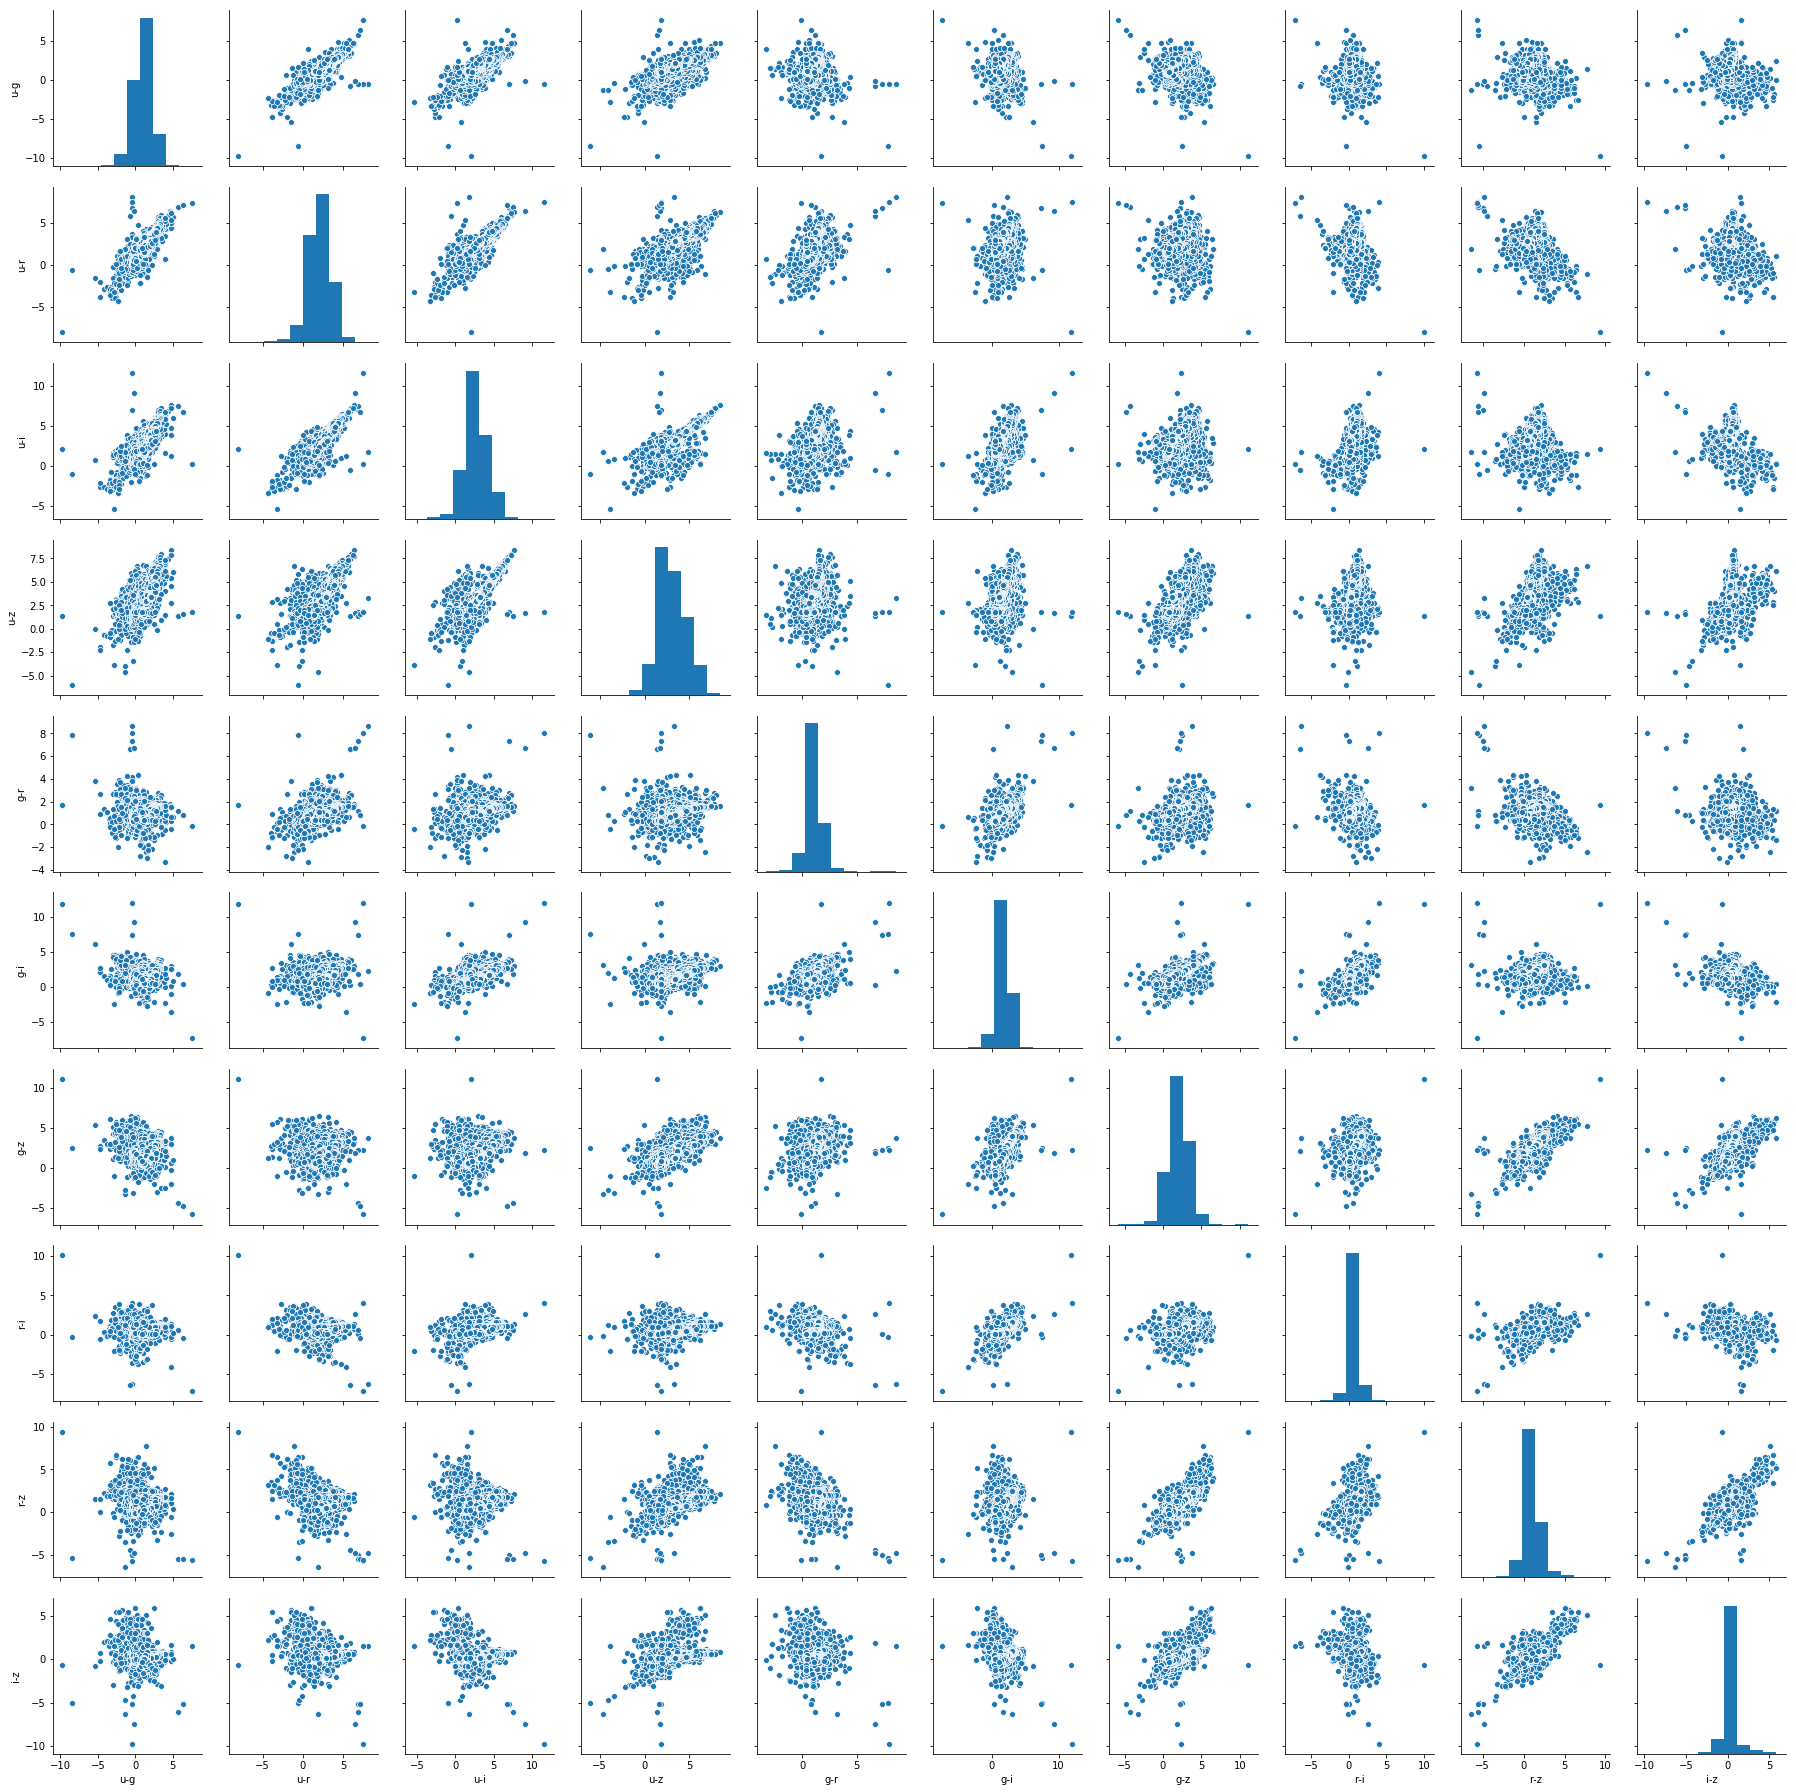

In [36]:
import seaborn as sns

g = sns.pairplot(colors.to_pandas(), dropna=True)
plt.show()


Using fits files<br>
http://docs.astropy.org/en/stable/io/fits/index.html

In [37]:
from astropy.io import fits

with fits.open('HR9087_Ha2.fts') as hdu:
    hdu.info()
    img_header = hdu[0].header
    img_data = hdu[0].data

Filename: HR9087_Ha2.fts
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     175   (1024, 1024)   int16 (rescales to uint16)   


In [38]:
img_header

SIMPLE  =                         T / standard conform fits format              
BITPIX  =                        16 / unsigned int 16 bit                       
NAXIS   =                         2 / two axes                                  
NAXIS1  =                      1024 / # of pixels per row starting at 1         
NAXIS2  =                      1024 / # of rows per frame starting at 1         
BSCALE  =                         1 / real pixel value = DN*BSCALE + BZERO      
BZERO   =                     32768 / real pixel value = DN*BSCALE + BZERO      
BLANK   =                     32768 / value used for null pixels                
INSTRUME= 'TEK1024x1024_BD'         / instrument used to acquire data           
OBJECT  = 'HR9087'                  / object identifier                         
FILENAME= 'HR9087_Ha'               / name of this file                         
IMAGETYP= 'object'                  / type of observation                       
EXPTIME =                   

In [39]:
img_header['ORIGIN']

'NOA -- Mt. Chelmos'

In [40]:
img_header.comments['ORIGIN']

'Observatory'

In [41]:
img_header['FLTNAME'] = 'V'
img_header

SIMPLE  =                         T / standard conform fits format              
BITPIX  =                        16 / unsigned int 16 bit                       
NAXIS   =                         2 / two axes                                  
NAXIS1  =                      1024 / # of pixels per row starting at 1         
NAXIS2  =                      1024 / # of rows per frame starting at 1         
BSCALE  =                         1 / real pixel value = DN*BSCALE + BZERO      
BZERO   =                     32768 / real pixel value = DN*BSCALE + BZERO      
BLANK   =                     32768 / value used for null pixels                
INSTRUME= 'TEK1024x1024_BD'         / instrument used to acquire data           
OBJECT  = 'HR9087'                  / object identifier                         
FILENAME= 'HR9087_Ha'               / name of this file                         
IMAGETYP= 'object'                  / type of observation                       
EXPTIME =                   

In [42]:
img_data

array([[2084, 2076, 2076, ..., 2079, 2077, 2080],
       [2086, 2078, 2078, ..., 2080, 2080, 2075],
       [2087, 2082, 2078, ..., 2082, 2078, 2078],
       ...,
       [2083, 2078, 2083, ..., 2079, 2081, 2074],
       [2087, 2078, 2078, ..., 2078, 2083, 2081],
       [2084, 2076, 2083, ..., 2079, 2079, 2083]], dtype=uint16)

In [43]:
img_data.shape

(1024, 1024)

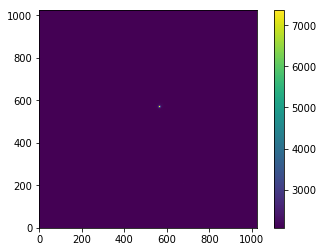

In [44]:
plt.figure()
plt.imshow(img_data, origin='lower')
plt.colorbar()
plt.show()

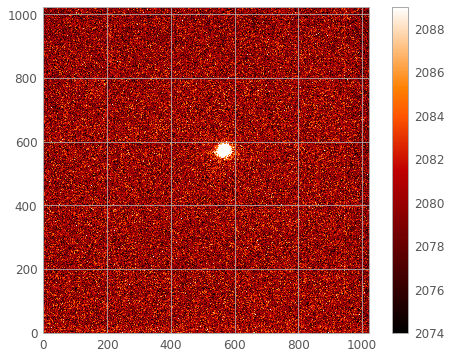

In [45]:
from astropy.visualization import ZScaleInterval, astropy_mpl_style, imshow_norm

plt.style.use(astropy_mpl_style)

plt.figure()
imshow_norm(img_data, origin='lower', interval=ZScaleInterval())
plt.colorbar()
plt.show()

In [46]:
filename = 'HR9087_Ha2.fts'
img_header = fits.getheader(filename)
img_header

SIMPLE  =                         T / standard conform fits format              
BITPIX  =                        16 / unsigned int 16 bit                       
NAXIS   =                         2 / two axes                                  
NAXIS1  =                      1024 / # of pixels per row starting at 1         
NAXIS2  =                      1024 / # of rows per frame starting at 1         
BSCALE  =                         1 / real pixel value = DN*BSCALE + BZERO      
BZERO   =                     32768 / real pixel value = DN*BSCALE + BZERO      
BLANK   =                     32768 / value used for null pixels                
INSTRUME= 'TEK1024x1024_BD'         / instrument used to acquire data           
OBJECT  = 'HR9087'                  / object identifier                         
FILENAME= 'HR9087_Ha'               / name of this file                         
IMAGETYP= 'object'                  / type of observation                       
EXPTIME =                   

In [47]:
img = fits.getdata(filename)
img

array([[2084, 2076, 2076, ..., 2079, 2077, 2080],
       [2086, 2078, 2078, ..., 2080, 2080, 2075],
       [2087, 2082, 2078, ..., 2082, 2078, 2078],
       ...,
       [2083, 2078, 2083, ..., 2079, 2081, 2074],
       [2087, 2078, 2078, ..., 2078, 2083, 2081],
       [2084, 2076, 2083, ..., 2079, 2079, 2083]], dtype=uint16)

In [48]:
keyword_telescope = fits.getval(filename, 'TELESCOP')
keyword_telescope

'Aristarchos'

Coordinates
------------------
http://docs.astropy.org/en/stable/coordinates/index.html

In [49]:
coord_str

'0h8m05.63s +14d50m23.3s'

In [50]:
from astropy import units as u
from astropy.coordinates import SkyCoord

c = SkyCoord(coord_str, unit=(u.hourangle, u.deg))
c

<SkyCoord (ICRS): (ra, dec) in deg
    (2.02345833, 14.83980556)>

In [51]:
c = SkyCoord(coord_str, unit=(u.hourangle, u.deg), frame='icrs')
c

<SkyCoord (ICRS): (ra, dec) in deg
    (2.02345833, 14.83980556)>

In [52]:
ra_str, dec_str = coord_str.split(' ')
print(ra_str, dec_str)

0h8m05.63s +14d50m23.3s


In [53]:
c = SkyCoord(ra_str, dec_str)
c

<SkyCoord (ICRS): (ra, dec) in deg
    (2.02345833, 14.83980556)>

In [54]:
c = SkyCoord(ra=2.02345833*u.deg, dec=14.83980556*u.deg)
c

<SkyCoord (ICRS): (ra, dec) in deg
    (2.02345833, 14.83980556)>

In [55]:
c.galactic

<SkyCoord (Galactic): (l, b) in deg
    (107.55627094, -46.73385789)>

In [56]:
c.fk5

<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (2.02346618, 14.83980789)>

In [57]:
c.get_constellation()

'Pegasus'

In [58]:
c.ra.hms

hms_tuple(h=0.0, m=8.0, s=5.629999199999993)

In [59]:
c.to_string('hmsdms')

'00h08m05.63s +14d50m23.3s'

In [60]:
from astropy.coordinates import EarthLocation, AltAz

helmos = EarthLocation(lon='-22d11m46s', lat='37d59m04s', height=2340*u.m)

c.transform_to(AltAz(location=helmos))

<SkyCoord (AltAz: obstime=None, location=(4662199.05464078, -1902239.06019161, 3905523.38440306) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (69.91395399, -1.34999971)>

You can define "arrays" of coordinates:

In [61]:
data_coords

objid,ra,dec,mjd,clean
int64,float64,float64,int64,int64
1237649816422187056,2.01219902915227,14.7894897997361,51459,0
1237649816422187203,1.95299341121944,14.8256122172716,51459,0
1237649816422187204,1.95463127970794,14.8339586786598,51459,0
1237649816422187211,2.01205735481028,14.8167239255447,51459,0
1237649816422187267,1.95287107651234,14.8804076222436,51459,0
1237649816422187268,1.95287107601496,14.8804076219384,51459,0
1237649816422187270,1.95458131330338,14.8812058944449,51459,0
1237649816422187505,2.01281446996018,14.8318121443411,51459,0
1237649816422187507,2.01189264407492,14.8203059185145,51459,0


In [62]:
data_skycoords = SkyCoord(ra=data_coords['ra'],
                          dec=data_coords['dec'],
                          unit='deg')

In [63]:
data_skycoords.galactic

<SkyCoord (Galactic): (l, b) in deg
    [(107.52291834, -46.77998869), (107.45484424, -46.73093741),
     (107.46007422, -46.72323559), ..., (107.62226955, -46.79754877),
     (107.62249766, -46.79757765), (107.63105742, -46.77570303)]>

In [64]:
distance = c.separation(data_skycoords)
distance


<Angle [0.0514797 , 0.06957985, 0.06678869, ..., 0.07810432, 0.07821839,
        0.06615387] deg>

In [65]:
mask_less1arcmin = distance < 1*u.arcmin
distance_less1arcmin = distance[mask_less1arcmin]
distance_less1arcmin.to(u.arcsec)

<Angle [4.69049557e+01, 4.71245972e+01, 4.67084697e+01, 4.67090065e+01,
        4.31357427e+01, 4.67796652e+01, 2.45725726e+01, 2.37122137e+01,
        3.92163600e+01, 2.46963142e+01, 2.46963143e+01, 2.10360754e+01,
        2.38361549e+01, 2.47064017e+01, 2.98409590e+01, 2.38122616e+01,
        2.46727409e+01, 2.37805865e+01, 2.36927637e+01, 2.45968300e+01,
        2.36775034e+01, 3.56829381e+01, 3.58664565e+01, 2.60560835e+01,
        3.60785283e+01, 3.79810751e+01, 3.62796809e+01, 2.76253606e+01,
        7.29542776e+00, 1.83972443e+01, 1.70146254e+01, 5.84971444e+01,
        2.30380933e+01, 2.32731006e+01, 8.18076605e+00, 8.13590232e+00,
        4.42381410e-02, 1.01517852e-02, 1.01496584e-02, 9.15331159e-02,
        8.09933424e-02, 8.12912141e-02, 3.99618624e+00, 4.87639739e+01,
        4.86120493e+01, 5.04030217e+01, 5.03669678e+01, 5.53630734e+01,
        5.52809514e+01, 4.92201365e+01, 5.53681470e+01, 5.53681470e+01,
        4.92097508e+01, 5.53542962e+01, 5.53542962e+01, 5.537384

In [66]:
np.any(np.where(distance_less1arcmin >= 60*u.arcsec))

False

In [67]:
data_coords[mask_less1arcmin].show_in_notebook()

idx,objid,ra,dec,mjd,clean
0,1237649816422187505,2.01281446996018,14.8318121443411,51459,0
1,1237649953859174998,2.01274244461626,14.8318023926081,51465,0
2,1237652943176139422,2.01284039284775,14.8318689055555,51814,0
3,1237652943176139423,2.01284028956042,14.8318687909027,51814,1
4,1237652943176139424,2.01284699502025,14.8336124473386,51814,0
5,1237653651835781803,2.01281862284389,14.8318637958124,51878,0
6,1237649816422187213,2.0267588929708,14.8337714100543,51459,0
7,1237649816422187604,2.02726771248712,14.8452668600611,51459,0
8,1237649816422187643,2.02738022174219,14.8500180662154,51459,0
9,1237649953859174735,2.0267983572657,14.8337527507667,51465,0


Matching Catalogs

In [68]:
from astroquery.irsa import Irsa

data_wise = Irsa.query_region(coord_str, catalog="allwise_p3as_psd",
                              spatial="Cone", radius='5arcmin')

data_wise.show_in_notebook()


/home/alnoah/miniconda2/envs/python_workshop_noforge/lib/python3.7/site-packages/astroquery/irsa/core.py:451: UserWarning: Coordinate string is being interpreted as an ICRS coordinate.
  warnings.warn("Coordinate string is being interpreted as an "


idx,designation,ra,dec,clon,clat,sigra,sigdec,sigradec,w1mpro,w1sigmpro,w1snr,w1rchi2,w2mpro,w2sigmpro,w2snr,w2rchi2,w3mpro,w3sigmpro,w3snr,w3rchi2,w4mpro,w4sigmpro,w4snr,w4rchi2,nb,na,w1sat,w2sat,w3sat,w4sat,pmra,sigpmra,pmdec,sigpmdec,cc_flags,ext_flg,var_flg,ph_qual,moon_lev,w1nm,w1m,w2nm,w2m,w3nm,w3m,w4nm,w4m,dist,angle,id
,,deg,deg,,,arcsec,arcsec,arcsec,mag,mag,,,mag,mag,,,mag,mag,,,mag,mag,,,,,,,,,maspyr,maspyr,maspyr,maspyr,,,,,,,,,,,,,,arcsec,deg,
0,J000805.66+145024.0,2.024,14.840,00h08m05.66s,14d50m24.01s,0.0562,0.0527,0.0323,12.644,0.032,34.4,4.367,12.325,0.032,33.5,1.312,9.481,0.05,21.8,0.9509,7.312,0.174,6.2,0.9739,2,1,0.0,0.0,0.0,0.0,-267,102,-252,100,0000,5,nnnn,AAAB,1100,22,22,22,22,12,12,1,12,0.851788,35.718811,0
1,J000805.41+145020.9,2.023,14.839,00h08m05.41s,14d50m20.91s,0.1231,0.1157,0.0783,13.806,0.067,16.2,4.367,13.596,0.078,13.9,1.312,10.808,0.152,7.1,0.9509,8.203,0.395,2.7,0.9739,2,1,0.0,0.0,0.0,0.0,--,--,--,--,0000,5,nnnn,AABC,1100,22,22,22,22,5,12,0,12,3.98846,232.880501,1
2,J000806.66+145013.4,2.028,14.837,00h08m06.66s,14d50m13.50s,0.4245,0.4461,-0.144,17.241,0.149,7.3,1.008,16.714,0.356,3.1,0.8872,12.575,--,-1.3,0.9235,8.78,--,0.3,0.9984,1,0,0.0,0.0,0.0,0.0,-772,2202,-23,2304,0000,0,nnnn,BBUU,1100,3,23,0,23,0,13,0,13,17.887284,123.283941,2
3,J000806.51+145043.3,2.027,14.845,00h08m06.52s,14d50m43.33s,0.3143,0.3207,-0.1053,16.863,0.112,9.7,0.9586,16.078,0.212,5.1,0.9223,12.504,--,0.3,1.151,8.467,--,0.9,0.9506,1,0,0.0,0.001,0.0,0.0,327,1389,254,1418,0000,0,nnnn,BBUU,1100,5,22,1,22,0,12,0,12,23.783426,32.703494,3
4,J000806.38+145000.9,2.027,14.834,00h08m06.39s,14d50m00.96s,0.5685,0.5998,-0.1944,17.697,0.219,5.0,1.025,16.777,0.387,2.8,0.8833,12.386,0.412,2.6,0.8649,8.629,--,1.0,1.003,1,0,0.0,0.0,0.0,0.0,-4820,2826,11198,2929,0000,0,nnnn,BCCU,1100,2,23,0,23,0,13,0,13,24.905038,153.835397,4
5,J000807.68+145028.7,2.032,14.841,00h08m07.68s,14d50m28.72s,0.6275,0.6757,-0.2095,18.327,0.406,2.7,0.9662,16.078,0.209,5.2,0.8326,12.551,--,-0.4,0.9186,8.97,--,0.2,1.007,1,0,0.0,0.0,0.0,0.0,1228,2841,1561,3039,0000,0,nnnn,CBUU,1100,1,22,1,22,0,12,0,12,30.258742,79.716013,5
6,J000808.07+145039.8,2.034,14.844,00h08m08.07s,14d50m39.88s,0.5095,0.5356,-0.1699,17.367,0.177,6.1,1.075,16.979,0.453,2.4,0.8707,12.126,--,0.9,0.8973,8.318,--,1.5,0.8869,1,0,0.0,0.0,0.0,0.0,-1586,2601,1328,2714,0000,0,nnnn,BCUU,1100,3,22,0,22,0,12,0,12,39.088499,64.930287,6
7,J000807.91+145055.2,2.033,14.849,00h08m07.92s,14d50m55.29s,0.6105,0.6224,-0.1901,17.579,0.194,5.6,0.9862,16.64,--,1.1,0.9197,12.504,--,-0.5,0.9293,8.911,--,0.0,1.112,1,0,0.0,0.0,0.0,0.0,-6,2958,1076,2996,0000,0,nnnn,BUUU,1100,1,22,0,22,0,12,0,12,46.081109,46.067442,7
8,J000805.85+145109.3,2.024,14.853,00h08m05.86s,14d51m09.39s,0.4408,0.4564,-0.1347,17.167,0.148,7.3,0.867,16.886,0.39,2.8,0.8476,12.579,--,-0.4,0.9228,8.918,--,-0.3,0.9183,1,0,0.0,0.0,0.0,0.0,2163,1935,-1517,2024,0000,0,nnnn,BCUU,1100,4,22,0,22,0,12,0,12,46.189155,4.061295,8


In [69]:
data_skycoords_wise = SkyCoord(data_wise['ra'], data_wise['dec'])

idx, d2d, _ = data_skycoords_wise.match_to_catalog_sky(data_skycoords)

**idx** are indices into **data_skycoords** that are the closest objects to each of the coordinates in **data_skycoords_wise**, **d2d** are the on-sky distances between them

In [70]:
matches = data_coords[idx]
matches

objid,ra,dec,mjd,clean
int64,float64,float64,int64,int64
1237652943176138866,2.02345533943799,14.8398303086215,51814,0
1237649816422187130,2.02346211630646,14.8397938293404,51459,0
1237649953859174738,2.02768046374609,14.8356237664539,51465,0
1237649816422187604,2.02726771248712,14.8452668600611,51459,0
1237652943176139119,2.02676935579541,14.833745284174,51814,1
1237649953859175295,2.03263178683551,14.8371311510393,51465,0
1237649953859240207,2.03322606049397,14.8463682894536,51465,0
1237649816422187522,2.03310105508325,14.8487443416467,51459,0
1237652943176139677,2.02795732550129,14.8537450666391,51814,0


In [99]:
mask_less1arcsec = d2d < 1*u.arcsec
len(np.where(mask_less1arcsec)[0])

159

In [72]:
idx_less1arcsec = idx[mask_less1arcsec]
matches_sdss = data_coords[idx_less1arcsec]
matches_sdss

objid,ra,dec,mjd,clean
int64,float64,float64,int64,int64
1237652943176138866,2.02345533943799,14.8398303086215,51814,0
1237649816422187604,2.02726771248712,14.8452668600611,51459,0
1237652943176139119,2.02676935579541,14.833745284174,51814,1
1237649816422187522,2.03310105508325,14.8487443416467,51459,0
1237649953859240569,2.03642019442214,14.8486835394173,51465,0
1237652943176139682,2.03090133104047,14.8564357492486,51814,0
1237649816422187607,2.0304593082077,14.8214913101833,51459,0
1237653651835781792,2.00648231285464,14.8507054893229,51878,0
1237649953859175176,2.028316076154,14.8195475081078,51465,0


In [73]:
matches_wise = data_wise[mask_less1arcsec]
matches_wise

designation,ra,dec,clon,clat,sigra,sigdec,sigradec,w1mpro,w1sigmpro,w1snr,w1rchi2,w2mpro,w2sigmpro,w2snr,w2rchi2,w3mpro,w3sigmpro,w3snr,w3rchi2,w4mpro,w4sigmpro,w4snr,w4rchi2,nb,na,w1sat,w2sat,w3sat,w4sat,pmra,sigpmra,pmdec,sigpmdec,cc_flags,ext_flg,var_flg,ph_qual,moon_lev,w1nm,w1m,w2nm,w2m,w3nm,w3m,w4nm,w4m,dist,angle,id
,deg,deg,,,arcsec,arcsec,arcsec,mag,mag,,,mag,mag,,,mag,mag,,,mag,mag,,,,,,,,,maspyr,maspyr,maspyr,maspyr,,,,,,,,,,,,,,arcsec,deg,
object,float64,float64,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,float64,float64,float64,float64,int32,int32,int32,int32,object,int32,object,object,object,int32,int32,int32,int32,int32,int32,int32,int32,float64,float64,object
J000805.66+145024.0,2.024,14.840,00h08m05.66s,14d50m24.01s,0.0562,0.0527,0.0323,12.644,0.032,34.4,4.367,12.325,0.032,33.5,1.312,9.481,0.05,21.8,0.9509,7.312,0.174,6.2,0.9739,2,1,0.0,0.0,0.0,0.0,-267,102,-252,100,0000,5,nnnn,AAAB,1100,22,22,22,22,12,12,1,12,0.851788,35.718811,0
J000806.51+145043.3,2.027,14.845,00h08m06.52s,14d50m43.33s,0.3143,0.3207,-0.1053,16.863,0.112,9.7,0.9586,16.078,0.212,5.1,0.9223,12.504,--,0.3,1.151,8.467,--,0.9,0.9506,1,0,0.0,0.001,0.0,0.0,327,1389,254,1418,0000,0,nnnn,BBUU,1100,5,22,1,22,0,12,0,12,23.783426,32.703494,3
J000806.38+145000.9,2.027,14.834,00h08m06.39s,14d50m00.96s,0.5685,0.5998,-0.1944,17.697,0.219,5.0,1.025,16.777,0.387,2.8,0.8833,12.386,0.412,2.6,0.8649,8.629,--,1.0,1.003,1,0,0.0,0.0,0.0,0.0,-4820,2826,11198,2929,0000,0,nnnn,BCCU,1100,2,23,0,23,0,13,0,13,24.905038,153.835397,4
J000807.91+145055.2,2.033,14.849,00h08m07.92s,14d50m55.29s,0.6105,0.6224,-0.1901,17.579,0.194,5.6,0.9862,16.64,--,1.1,0.9197,12.504,--,-0.5,0.9293,8.911,--,0.0,1.112,1,0,0.0,0.0,0.0,0.0,-6,2958,1076,2996,0000,0,nnnn,BUUU,1100,1,22,0,22,0,12,0,12,46.081109,46.067442,7
J000808.72+145054.9,2.036,14.849,00h08m08.72s,14d50m54.95s,0.3462,0.3614,-0.1149,16.936,0.115,9.4,0.9475,17.028,0.468,2.3,0.9313,12.602,--,-0.5,0.869,8.941,--,-0.1,1.029,1,0,0.0,0.0,0.0,0.0,-153,1525,981,1584,0000,0,nnnn,BCUU,1100,5,22,0,22,0,12,0,12,54.895078,54.816301,10
J000807.37+145123.2,2.031,14.856,00h08m07.38s,14d51m23.22s,0.4221,0.4343,-0.1388,17.147,0.136,8.0,0.9284,16.789,--,0.9,0.8718,12.414,--,-0.6,0.8949,8.98,--,-0.5,1.015,1,0,0.0,0.0,0.0,0.0,1545,1867,25,1924,0000,0,nnnn,BUUU,1100,4,22,0,22,0,12,0,12,65.026386,22.894715,12
J000807.28+144916.8,2.030,14.821,00h08m07.29s,14d49m16.88s,0.3316,0.3429,-0.0982,16.868,0.11,9.9,1.156,16.752,--,1.1,0.9641,12.633,--,-0.5,0.9534,8.996,--,-1.4,1.018,1,0,0.0,0.0,0.0,0.0,1207,1430,-2000,1480,0000,0,nnnn,BUUU,1100,7,22,0,22,0,12,0,12,70.643776,160.122043,14
J000801.53+145102.5,2.006,14.851,00h08m01.54s,14d51m02.59s,0.4541,0.4608,-0.1294,17.222,0.144,7.6,0.9162,17.161,--,-0.9,0.8924,12.508,--,-0.3,0.9796,8.403,--,1.2,0.8229,1,0,0.0,0.0,0.0,0.0,2022,1962,1560,1998,0000,0,nnnn,BUUU,1100,4,22,0,22,0,12,0,12,71.169967,303.496685,15


In [74]:
matches = hstack([matches_sdss, matches_wise])
matches

objid,ra_1,dec_1,mjd,clean,designation,ra_2,dec_2,clon,clat,sigra,sigdec,sigradec,w1mpro,w1sigmpro,w1snr,w1rchi2,w2mpro,w2sigmpro,w2snr,w2rchi2,w3mpro,w3sigmpro,w3snr,w3rchi2,w4mpro,w4sigmpro,w4snr,w4rchi2,nb,na,w1sat,w2sat,w3sat,w4sat,pmra,sigpmra,pmdec,sigpmdec,cc_flags,ext_flg,var_flg,ph_qual,moon_lev,w1nm,w1m,w2nm,w2m,w3nm,w3m,w4nm,w4m,dist,angle,id
,,,,,,deg,deg,,,arcsec,arcsec,arcsec,mag,mag,,,mag,mag,,,mag,mag,,,mag,mag,,,,,,,,,maspyr,maspyr,maspyr,maspyr,,,,,,,,,,,,,,arcsec,deg,
int64,float64,float64,int64,int64,object,float64,float64,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,float64,float64,float64,float64,int32,int32,int32,int32,object,int32,object,object,object,int32,int32,int32,int32,int32,int32,int32,int32,float64,float64,object
1237652943176138866,2.02345533943799,14.8398303086215,51814,0,J000805.66+145024.0,2.024,14.840,00h08m05.66s,14d50m24.01s,0.0562,0.0527,0.0323,12.644,0.032,34.4,4.367,12.325,0.032,33.5,1.312,9.481,0.05,21.8,0.9509,7.312,0.174,6.2,0.9739,2,1,0.0,0.0,0.0,0.0,-267,102,-252,100,0000,5,nnnn,AAAB,1100,22,22,22,22,12,12,1,12,0.851788,35.718811,0
1237649816422187604,2.02726771248712,14.8452668600611,51459,0,J000806.51+145043.3,2.027,14.845,00h08m06.52s,14d50m43.33s,0.3143,0.3207,-0.1053,16.863,0.112,9.7,0.9586,16.078,0.212,5.1,0.9223,12.504,--,0.3,1.151,8.467,--,0.9,0.9506,1,0,0.0,0.001,0.0,0.0,327,1389,254,1418,0000,0,nnnn,BBUU,1100,5,22,1,22,0,12,0,12,23.783426,32.703494,3
1237652943176139119,2.02676935579541,14.833745284174,51814,1,J000806.38+145000.9,2.027,14.834,00h08m06.39s,14d50m00.96s,0.5685,0.5998,-0.1944,17.697,0.219,5.0,1.025,16.777,0.387,2.8,0.8833,12.386,0.412,2.6,0.8649,8.629,--,1.0,1.003,1,0,0.0,0.0,0.0,0.0,-4820,2826,11198,2929,0000,0,nnnn,BCCU,1100,2,23,0,23,0,13,0,13,24.905038,153.835397,4
1237649816422187522,2.03310105508325,14.8487443416467,51459,0,J000807.91+145055.2,2.033,14.849,00h08m07.92s,14d50m55.29s,0.6105,0.6224,-0.1901,17.579,0.194,5.6,0.9862,16.64,--,1.1,0.9197,12.504,--,-0.5,0.9293,8.911,--,0.0,1.112,1,0,0.0,0.0,0.0,0.0,-6,2958,1076,2996,0000,0,nnnn,BUUU,1100,1,22,0,22,0,12,0,12,46.081109,46.067442,7
1237649953859240569,2.03642019442214,14.8486835394173,51465,0,J000808.72+145054.9,2.036,14.849,00h08m08.72s,14d50m54.95s,0.3462,0.3614,-0.1149,16.936,0.115,9.4,0.9475,17.028,0.468,2.3,0.9313,12.602,--,-0.5,0.869,8.941,--,-0.1,1.029,1,0,0.0,0.0,0.0,0.0,-153,1525,981,1584,0000,0,nnnn,BCUU,1100,5,22,0,22,0,12,0,12,54.895078,54.816301,10
1237652943176139682,2.03090133104047,14.8564357492486,51814,0,J000807.37+145123.2,2.031,14.856,00h08m07.38s,14d51m23.22s,0.4221,0.4343,-0.1388,17.147,0.136,8.0,0.9284,16.789,--,0.9,0.8718,12.414,--,-0.6,0.8949,8.98,--,-0.5,1.015,1,0,0.0,0.0,0.0,0.0,1545,1867,25,1924,0000,0,nnnn,BUUU,1100,4,22,0,22,0,12,0,12,65.026386,22.894715,12
1237649816422187607,2.0304593082077,14.8214913101833,51459,0,J000807.28+144916.8,2.030,14.821,00h08m07.29s,14d49m16.88s,0.3316,0.3429,-0.0982,16.868,0.11,9.9,1.156,16.752,--,1.1,0.9641,12.633,--,-0.5,0.9534,8.996,--,-1.4,1.018,1,0,0.0,0.0,0.0,0.0,1207,1430,-2000,1480,0000,0,nnnn,BUUU,1100,7,22,0,22,0,12,0,12,70.643776,160.122043,14
1237653651835781792,2.00648231285464,14.8507054893229,51878,0,J000801.53+145102.5,2.006,14.851,00h08m01.54s,14d51m02.59s,0.4541,0.4608,-0.1294,17.222,0.144,7.6,0.9162,17.161,--,-0.9,0.8924,12.508,--,-0.3,0.9796,8.403,--,1.2,0.8229,1,0,0.0,0.0,0.0,0.0,2022,1962,1560,1998,0000,0,nnnn,BUUU,1100,4,22,0,22,0,12,0,12,71.169967,303.496685,15


In [75]:
coords1 = SkyCoord(matches['ra_1'], matches['dec_1'], unit='deg')
coords2 = SkyCoord(matches['ra_2'], matches['dec_2'], unit='deg')
d = coords1.separation(coords2)
np.any(np.where(d >= 1*u.arcsec))

False

Many more tools:
- Proper motion correction
- Radial velocities
- 3D coordinates (with distances)
- User defined frames
- ...

Times and dates
------------------------
http://docs.astropy.org/en/stable/coordinates/index.html

In [76]:
from astropy.time import Time

obs_time = Time(data_coords['mjd'], format='mjd')
obs_time

<Time object: scale='utc' format='mjd' value=[51459. 51459. 51459. ... 51878. 52144. 52144.]>

In [77]:
obs_time.decimalyear

array([1999.76712329, 1999.76712329, 1999.76712329, ..., 2000.91256831,
       2001.64109589, 2001.64109589])

In [78]:
obs_time[0].iso

'1999-10-08 00:00:00.000'

In [79]:
dtime = obs_time[-1] - obs_time[0]
dtime

<TimeDelta object: scale='tai' format='jd' value=685.0>

In [80]:
dtime.to(u.s)

<Quantity 59184000. s>

Visibility of a target during the day

In [81]:
target_coords = SkyCoord.from_name('HR9087')
target_coords

<SkyCoord (ICRS): (ra, dec) in deg
    (0.455833, -3.0275)>

2019-03-05 17:58:55.493134
2019-03-06 17:58:55.493134


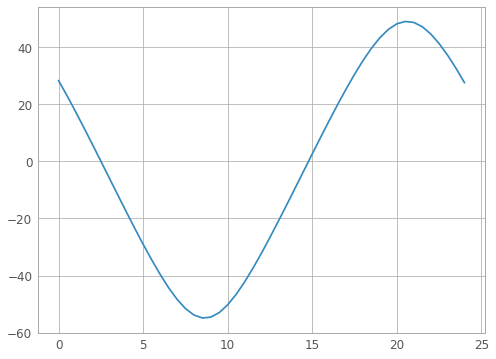

In [103]:
utcoffset = 2*u.hour
date_today = Time.now() + utcoffset
date_tomorrow = date_today + 1*u.day
print(date_today)
print(date_tomorrow)

obstime = Time(np.linspace(date_today.mjd, date_tomorrow.mjd, num=49), format='mjd')
delta_time = obstime - date_today

frame = AltAz(obstime=obstime, location=helmos)
target_altazs = target_coords.transform_to(frame)

plt.plot(delta_time.to(u.hour), target_altazs.alt)
plt.show()

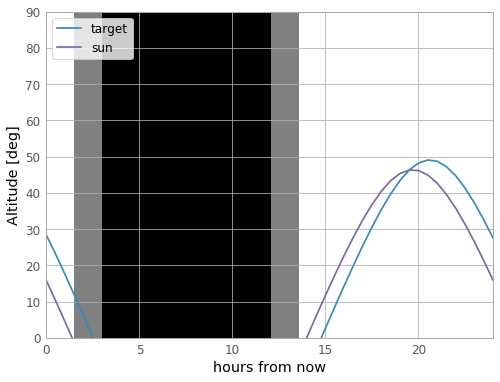

In [104]:
from astropy.coordinates import get_sun

sun_coords = get_sun(obstime - utcoffset)
sun_altazs = sun_coords.transform_to(frame)

plt.plot(delta_time.to(u.hour), target_altazs.alt, label='target')
plt.plot(delta_time.to(u.hour), sun_altazs.alt, label='sun')

# Night hours
plt.fill_between(delta_time.to('hr').value, 0, 90,
                 sun_altazs.alt < 0*u.deg,
                 color='0.5', zorder=0)
plt.fill_between(delta_time.to('hr').value, 0, 90,
                 sun_altazs.alt < -18*u.deg,
                 color='black', zorder=0)

plt.xlim(0, 24)
plt.ylim(0, 90)

plt.xlabel('hours from now')
plt.ylabel('Altitude [{}]'.format(target_altazs.alt.unit))

plt.legend(loc='upper left')
plt.show()

World Coordinate System
-------------------------------------
http://docs.astropy.org/en/stable/wcs/index.html

Image pixels to sky coordinates

In [84]:
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename

filename = get_pkg_data_filename('tutorials/FITS-images/HorseHead.fits')

img_hdr = fits.getheader(filename)
wcs = WCS(img_hdr)



In [85]:
wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 85.59941666666666  -4.946638888888889  
CRPIX : -716.333144294269  -8444.64946698226  
PC1_1 PC1_2  : 0.015029018460682027  -9.63735777657198e-06  
PC2_1 PC2_2  : 1.0548917307845708e-05  0.015000473845055023  
CDELT : -0.018654788242111486  0.018654788242111486  
NAXIS : 891  893

In [86]:
wcs = WCS(filename)
wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 85.59941666666666  -4.946638888888889  
CRPIX : -716.333144294269  -8444.64946698226  
PC1_1 PC1_2  : 0.015029018460682027  -9.63735777657198e-06  
PC2_1 PC2_2  : 1.0548917307845708e-05  0.015000473845055023  
CDELT : -0.018654788242111486  0.018654788242111486  
NAXIS : 891  893

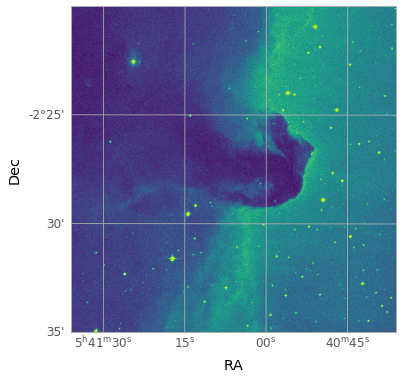

In [87]:
img = fits.getdata(filename)

plt.subplot(111, projection=wcs)
plt.imshow(img, origin='lower', cmap=plt.cm.viridis)
plt.xlabel('RA')
plt.ylabel('Dec')
plt.show()

In [88]:
from astropy.wcs.utils import pixel_to_skycoord, skycoord_to_pixel

coord_zero = pixel_to_skycoord([0, 5], [0, 5], wcs)
coord_zero

<SkyCoord (ICRS): (ra, dec) in deg
    [(85.39972238, -2.58321572), (85.39832076, -2.58181538)]>

In [89]:
skycoord_to_pixel(coord_zero, wcs)

(array([2.16422436e-11, 5.00000000e+00]),
 array([3.63797881e-12, 5.00000000e+00]))

Cosmological Calculations
---------------------------------------
http://docs.astropy.org/en/stable/cosmology/index.html

In [90]:
from astropy.cosmology import Planck15 as cosmo

H0 = cosmo.H(0)
H0

<Quantity 67.74 km / (Mpc s)>

In [91]:
from astropy.cosmology import FlatLambdaCDM

cosmo2 = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)
cosmo2

FlatLambdaCDM(H0=70 km / (Mpc s), Om0=0.3, Tcmb0=2.725 K, Neff=3.04, m_nu=[0. 0. 0.] eV, Ob0=None)

In [92]:
cosmo2.Ode0

0.6999147525906917

In [93]:
z = 2.0
cosmo.age(z)

<Quantity 3.28395414 Gyr>

In [94]:
cosmo.lookback_time(z)

<Quantity 10.51366252 Gyr>

In [95]:
cosmo.comoving_distance(z)

<Quantity 5311.53878858 Mpc>

In [96]:
cosmo.angular_diameter_distance(z)

<Quantity 1770.51292953 Mpc>

In [97]:
dl = cosmo.luminosity_distance(z)
dl

<Quantity 15934.61636574 Mpc>

In [98]:
flux = 1e-14 * u.erg / u.s / u.cm**2
luminosity = 4*np.pi*(dl.to(u.cm)**2) * flux
luminosity

<Quantity 3.03804483e+44 erg / s>

Statistics
--------------

http://docs.astropy.org/en/stable/stats/index.html

Sigma clipping:

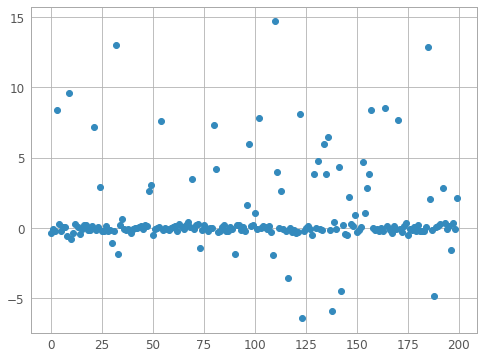

In [108]:
import numpy as np
import scipy.stats as stats

x = np.arange(200)
y = np.zeros(200)
c = stats.bernoulli.rvs(0.35, size=x.shape)
y += (np.random.normal(0., 0.2, x.shape) + c*np.random.normal(3.0, 5.0, x.shape))

plt.plot(x, y, 'o')
plt.show()

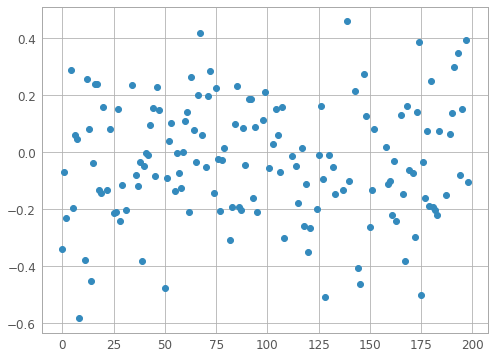

In [109]:
from astropy.stats import sigma_clip

filtered_data = sigma_clip(y, sigma=3, maxiters=10)

plt.plot(x, filtered_data, 'o')
plt.show()

Binning of histograms using Bayesian Blocks

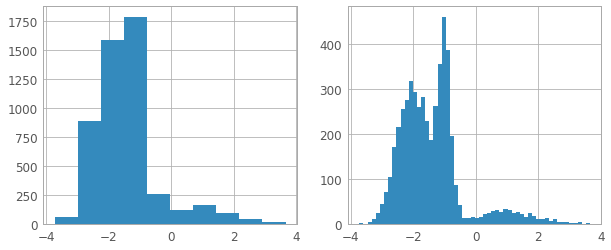

In [124]:
y1 = np.random.normal(-2, 0.5, 3000)
y2 = np.random.normal(-1, 0.2, 1500)
y3 = np.random.normal(1, 1.0, 500)
y = np.concatenate((y1, y2, y3))

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.hist(y, bins=10)

plt.subplot(122)
plt.hist(y, bins=100)

plt.show()

In [133]:
from astropy.stats import bayesian_blocks

bins = bayesian_blocks(y, fitness='events', gamma=1)


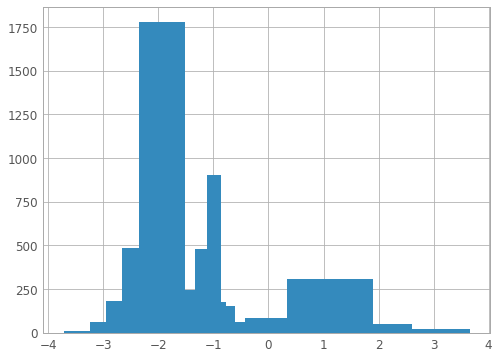

In [128]:
plt.hist(y, bins=bins)
plt.show()